# Introduction to regression with Neural Networks in Tensorflow

In [1]:
# Import Tensorflow

import tensorflow as tf
print(tf.__version__)

2024-05-22 04:47:01.671829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


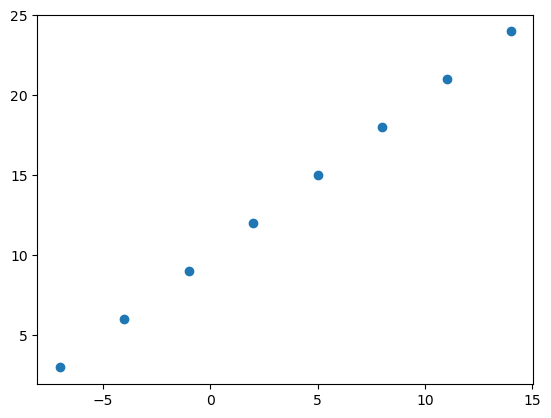

In [47]:
# Create data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize
plt.scatter(X, y)

In [48]:
# Here's the actual formula
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [49]:
# Input and Output Shapes (Is a scalar - Rank 0 tensor) - 1 X value to predict 1 Y value
X[0], y[0]

(-7.0, 3.0)

In [50]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [51]:
X[0].ndim

0

In [52]:
# Turn NP array into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [90]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(), 
    metrics=["mae"]
)

In [91]:
# Fit data onto model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 250ms/step - loss: 7.9834 - mae: 7.9834
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 7.8509 - mae: 7.8509
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 7.7184 - mae: 7.7184
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 7.5859 - mae: 7.5859
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 7.4700 - mae: 7.4700


In [92]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [93]:
# Make a prediction
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 122ms/step


In [94]:
# Clear session for next example
tf.keras.backend.clear_session()

## Let's improve model...

1) **Creating a model** - we can add more layers, increase number of hidden layers, change activation function of each models.  Start with small model and make into larger model

2) **Compiling a model** - here we might change optimization of a function or **learning rate** of the optimization function

3) **Fitting a model** - here we might fit a model for more **epoch** (leaving it training for longer), or on more data (give the model more data to learn from).

In [99]:
# Set random seed
tf.random.set_seed(42)

# Create Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [100]:
# Fit model (This time we train longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 267ms/step - loss: 13.9017 - mae: 13.9017
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.7692 - mae: 13.7692
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.6367 - mae: 13.6367
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.5042 - mae: 13.5042
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 13.3717 - mae: 13.3717
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2392 - mae: 13.2392
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.1067 - mae: 13.1067
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 12.9742 - mae: 12.9742
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8417 - mae: 12.8417
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7092 - mae: 12.7092
Epoch 11/100
1/1 [==============================] - 0s 

In [107]:
# Predict model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 53ms/step


array([[26.8855]], dtype=float32)

In [110]:
# Clear session for next example
tf.keras.backend.clear_session()

In [104]:
# Let's see if we can improve it even more

# 1. Create the model (this time with an extra hidden layer)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 430ms/step - loss: 12.1407 - mae: 12.1407
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.3754 - mae: 11.3754
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6059 - mae: 10.6059
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8303 - mae: 9.8303
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 9.0465 - mae: 9.0465
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.2522 - mae: 8.2522
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4451 - mae: 7.4451
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 6.9102 - mae: 6.9102
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 7.0768 - mae: 7.0768
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 7.3548 - mae: 7.3548
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5229 - ma

In [106]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 45ms/step


array([[26.8855]], dtype=float32)

In [196]:
# Clear session for next example
tf.keras.backend.clear_session()

In [197]:
# Let's see if we can improve it even more
tf.random.set_seed(42)

# 1. Create the model (this time with an extra hidden layer)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None), 
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100


/usr/local/Caskroom/miniconda/base/envs/tensor/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 432ms/step - loss: 15.1478 - mae: 15.1478
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 14.3604 - mae: 14.3604
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.6517 - mae: 13.6517
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9525 - mae: 12.9525
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2583 - mae: 12.2583
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.5666 - mae: 11.5666
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8755 - mae: 10.8755
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.1832 - mae: 10.1832
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 9.4873 - mae: 9.4873
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7855 - mae: 8.7855
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 8

In [198]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [199]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 70ms/step


array([[26.38193]], dtype=float32)

In [200]:
# Best model so far
tf.keras.backend.clear_session()

# Let's see if we can improve it even more
tf.random.set_seed(42)

# 1. Create the model (this time with an extra hidden layer)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mse",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 


Epoch 1/100
1/1 [==============================] - 0s 287ms/step - loss: 81.7680 - mae: 8.6377
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 76.8287 - mae: 7.6361
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 74.3266 - mae: 7.6832
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 71.9891 - mae: 7.5290
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 69.7283 - mae: 7.4161
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 67.5386 - mae: 7.2975
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 65.4177 - mae: 7.1823
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 63.3633 - mae: 7.0686
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 61.3735 - mae: 6.9567
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 59.4462 - mae: 6.8466
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [202]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 63ms/step


array([[27.027308]], dtype=float32)

In [203]:
# Create a demo tensor for our housing prediction model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700,])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Evaluating a model

In practice, a typical workflow you go through is:
``` 
Build model -> Fit -> Evaluate -> Build model -> Fit -> Evaluate -> Build model -> Fit -> Evaluate
```

When it comes to evaluation, there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data
* The model
* The training of the model
* The prediction of the model

In [204]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [205]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

### The three sets

* Training set - model learns from this data, typically 70-80% of data
* Validation set - model tunes from this data, typically remaining 10%-15% data
* Test Set - model gets evaluated from this data, typically 10% - 15% data


In [212]:
# Check sample length
len(X), len(y)

(50, 50)

In [213]:
# Spilt the data into training and test sets
SPILT = 0.8

# Features training & testing (X)
X_train = X[:int(SPILT * len(X))]
X_test = X[int(SPILT * len(X)):]

# Labels training & testing (y)
y_train = y[:int(SPILT * len(y))]
y_test = y[int(SPILT * len(y)):]

# Show output
X_train, X_test, y_train, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)